In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv("Mall_Customers.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.shape

(200, 5)

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

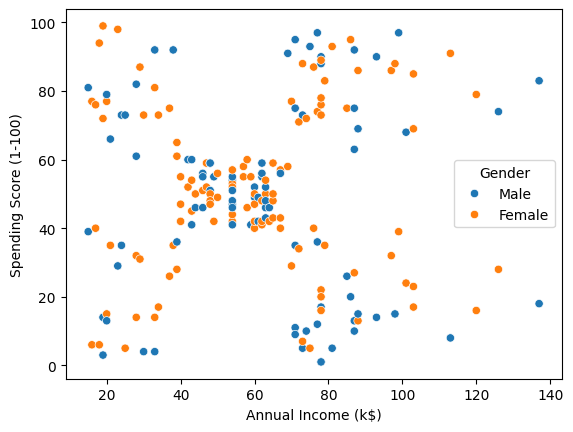

In [15]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

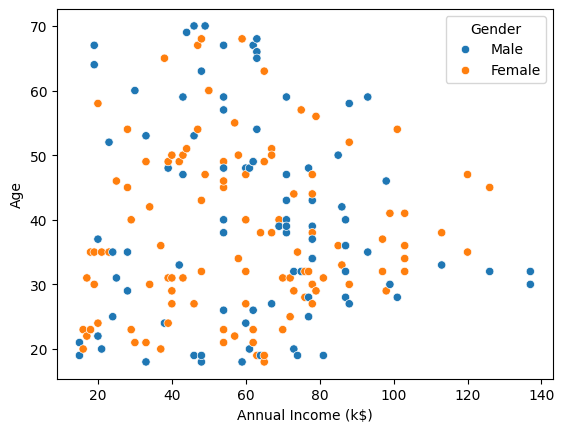

In [16]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Age', hue='Gender')

<Axes: xlabel='Gender', ylabel='count'>

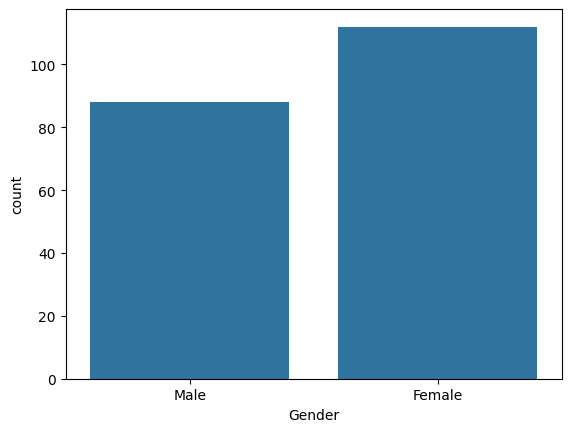

In [17]:
sns.countplot(data=df, x="Gender")

In [18]:
laencoder = LabelEncoder()
df['Gender'] = laencoder.fit_transform(df['Gender'])

In [19]:
x=df.drop(['CustomerID'],axis=1)
scaler=StandardScaler()
xt=scaler.fit_transform(x)

**K-Means**

 (1)Using Gender and Spending Score

In [20]:
xt1 = xt[:,[0,3]]
wcss_1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(xt1)
    wcss_1.append(kmeans.inertia_)

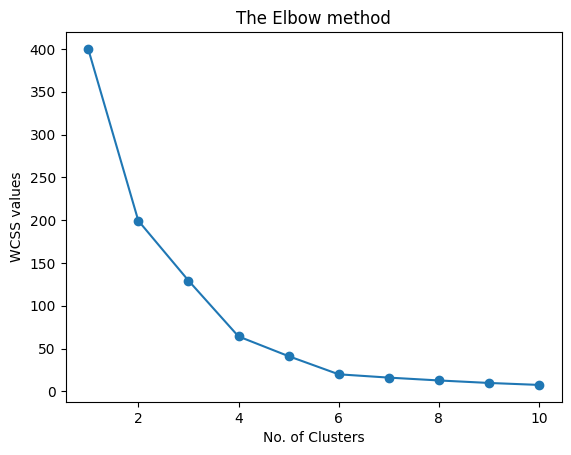

In [24]:
plt.plot(range(1,11), wcss_1, marker='o')
plt.title("The Elbow method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS values")
plt.show()

In [27]:
kmeans_1 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_pred = kmeans_1.fit_predict(xt1)

In [28]:
centroid=kmeans_1.cluster_centers_
centroid

array([[ 1.12815215, -1.18839648],
       [-0.88640526,  1.03764486],
       [ 1.12815215,  0.64141845],
       [-0.88640526, -0.54017429]])

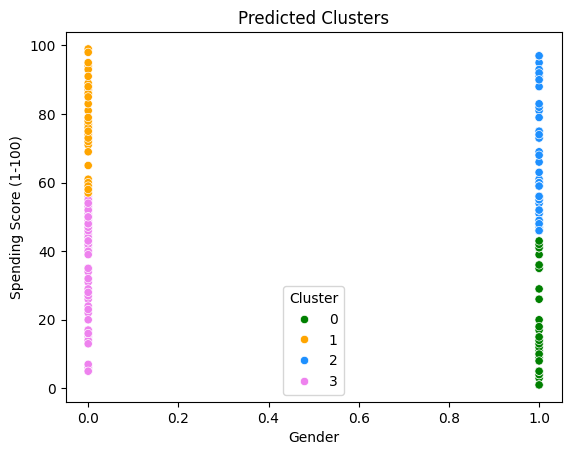

In [49]:
df["Cluster"] = y_pred
sns.scatterplot(x="Gender",y= "Spending Score (1-100)", data = df, hue="Cluster", palette=['green','orange','dodgerblue','violet'], legend='full')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Predicted Clusters')
plt.show()

(2)Using Age and Spending Score

In [31]:
xt2=xt[:,[1,3]]
wcss_2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(xt2)
    wcss_2.append(kmeans.inertia_)

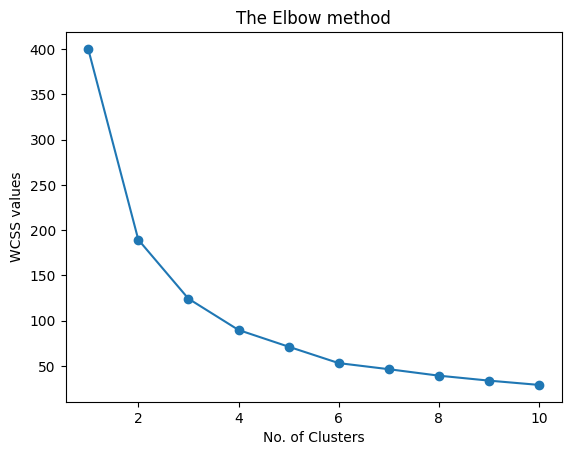

In [32]:
plt.plot(range(1,11), wcss_2, marker='o')
plt.title("The Elbow method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS values")
plt.show()

In [33]:
kmeans_2 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
yt2= kmeans_2.fit_predict(xt2)

In [43]:
centroid=kmeans_2.cluster_centers_
centroid

array([[-0.8346466 , -0.39442706],
       [ 1.22927178, -0.06558366],
       [-0.61415725,  1.14971545],
       [ 0.62833625, -1.36651894]])

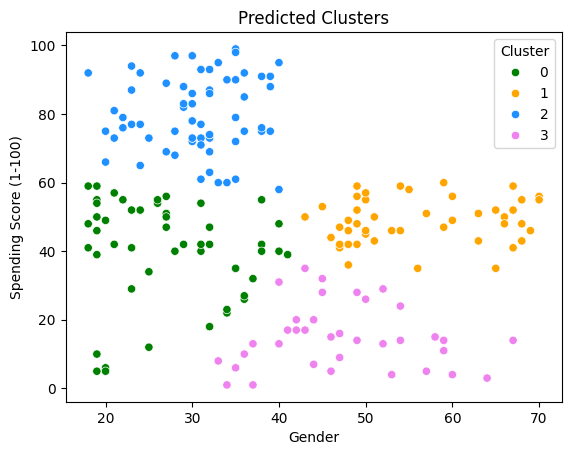

In [48]:
df["Cluster"] = yt2
sns.scatterplot(x="Age",y= "Spending Score (1-100)", data = df, hue="Cluster", palette=['green','orange','dodgerblue','violet'], legend='full')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Predicted Clusters')
plt.show()

(3)Using Annual Income and Spending Score

In [36]:
xt3 = xt[:,[2,3]]
wcss_3 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(xt)
    wcss_3.append(kmeans.inertia_)

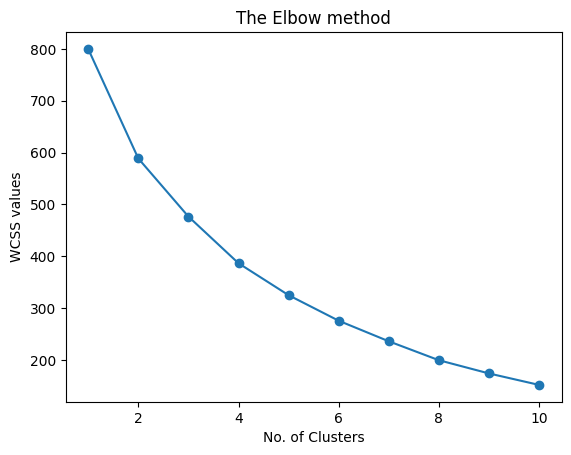

In [38]:
plt.plot(range(1,11), wcss_3, marker='o')
plt.title("The Elbow method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS values")
plt.show()

In [39]:
kmeans_3 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
yt3= kmeans_3.fit_predict(xt3)

In [45]:
centroid=kmeans_3.cluster_centers_
centroid

array([[-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [ 1.00919971, -1.22553537],
       [-0.46948398,  0.2437994 ]])

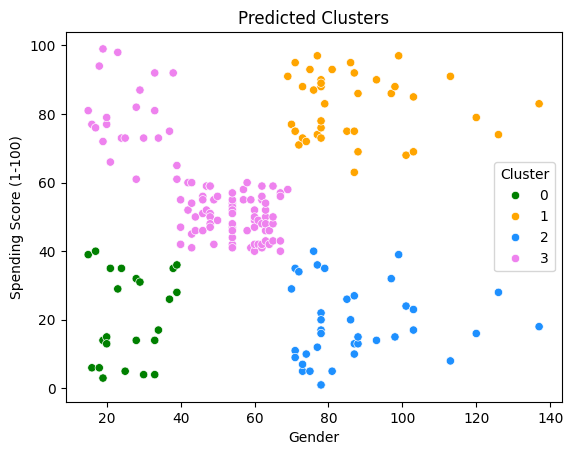

In [47]:
df["Cluster"] = yt3
sns.scatterplot(x="Annual Income (k$)",y= "Spending Score (1-100)", data = df, hue="Cluster", palette=['green','orange','dodgerblue','violet'], legend='full')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Predicted Clusters')
plt.show()